In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.


As final considerations:


You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
See Example Solution for a reference on expected format.

In [24]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import codecs
import requests as request
import json
from random import Random
from config import weather_api_key
from citipy import citipy 
from pprint import pprint
from unicodedata import normalize
import matplotlib.pyplot as plt

In [14]:
wkey = weather_api_key
url = "http://api.openweathermap.org/data/2.5/group"

In [15]:
#select random latitude and longitude and append the values

coordinates = []
r = Random()
r.seed()
for x in range(500):
    lat = r.randint(-90, 90)
    lon = r.randint(-180, 180)
    coordinates.append([lat, lon])
print(coordinates)

[[63, 22], [-23, 24], [-46, -106], [-85, 138], [-62, 25], [64, 36], [47, 138], [39, -86], [48, -105], [18, 84], [-12, 68], [20, -121], [-25, 49], [-23, -114], [-12, -6], [-12, -69], [90, -40], [-77, -13], [57, -55], [17, -116], [19, -105], [-90, 62], [-31, -105], [53, -59], [-32, -103], [19, -106], [-55, -114], [-34, 162], [-40, -81], [28, 147], [-50, 49], [32, 89], [-77, -164], [2, -94], [-55, 93], [59, 156], [56, -60], [-87, -157], [40, 40], [75, -36], [29, 106], [-36, -30], [-32, -34], [-41, -178], [66, 2], [74, -122], [49, 97], [-41, -25], [-32, -97], [65, -113], [23, -73], [90, -128], [41, -14], [-29, -91], [-51, -86], [-63, 159], [-47, 102], [72, 5], [58, -119], [86, 47], [16, -51], [16, 166], [74, 44], [88, 177], [-36, -102], [83, 36], [27, 148], [-45, -126], [45, 126], [57, -153], [80, 49], [71, 42], [-55, -102], [54, -73], [-26, -49], [69, 145], [-69, 69], [21, -42], [-59, -42], [14, -105], [21, 169], [-89, 20], [-56, -65], [43, 148], [24, 93], [-1, -179], [-53, 72], [1, 145],

In [16]:
cities = []
for lat, lon in coordinates:
    cities.append(citipy.nearest_city(lat, lon))

city_ids = []
for city in cities:
    city_ids.append(city.country_code + city.city_name)

In [17]:
#open json file and import city id and append to list

with open('city.list.json', 'r', encoding='utf-8') as json_file:
    text = json_file.read()
    json_data = json.loads(text)

ids = []
for c in json_data:
    ccc = str(normalize('NFKD', c["country"] + c["name"])\
              .encode('ascii','ignore'), 'ascii').lower()
    if ccc in city_ids:
        ids.append(str(c['id'])) 
print(ids)

['2206939', '3081368', '7839581', '933726', '2064735', '6050066', '5273134', '7839593', '7839477', '1506938', '3423146', '3422683', '2598243', '1633419', '6539617', '2112309', '2209055', '5855927', '1006984', '3428182', '2012530', '2015852', '2017155', '2123979', '2126785', '4031574', '2960970', '1852357', '1650213', '632674', '3831208', '4020109', '7521588', '2152659', '651301', '1830377', '4264617', '5830062', '5847411', '5850554', '986717', '472878', '527321', '543246', '547871', '556268', '1500036', '1501377', '526565', '2021343', '2126123', '2015306', '2022572', '7839778', '4182260', '5919850', '964420', '5457268', '305267', '5272776', '3421765', '2123814', '305268', '6185377', '2163355', '7839672', '2145110', '3652764', '2070998', '2122605', '2016910', '1510689', '2126682', '1507390', '2012593', '2123278', '2120612', '2126199', '1490256', '2018735', '2294915', '3369157', '2541472', '6547050', '2541479', '5367788', '4182259', '470762', '2025630', '2165087', '7839657', '2077963', '

In [18]:
#get temp, humidity, cloudiness, and wind speed for each city
params = {'appid': weather_api_key,
          'id': '',
          'mode': json,
          'units': 'imperial'
          }

batch_size = 5
weather_data = []
while len(ids) > 0:
    if len(ids) >= batch_size:
        id = ",".join(ids[0: batch_size])
        del ids[0: batch_size]
    else:
        id = ",".join(ids)
        ids = []

    params['id'] = id
    response = request.get(url, params=params).json()
    weather_data += response['list']

In [20]:
#appened the values to lists and create a dataframe with the values. 
city_lat = []
city_temp = []
city_humidity = []
city_clouds = []
city_wind = []

for city in weather_data:
    city_lat.append(city['coord']['lat'])
    city_temp.append(city['main']['temp'])
    city_humidity.append(city['main']['humidity'])
    city_clouds.append(city['clouds']['all'])
    city_wind.append(city['wind']['speed'])

city_weather = pd.DataFrame({"Latitude": city_lat,
                                "Temperature": city_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind}) 
city_weather.head()

,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,-46.60,62.56,88,48,4.52
1,51.10,24.80,92,0,5.82
2,-27.98,82.40,65,88,9.17
3,-24.00,77.14,36,68,11.45
4,-12.23,82.40,78,75,11.41


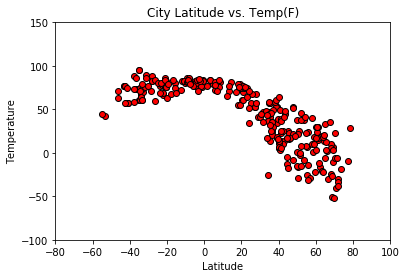

In [25]:
#scatterplots of Temperature (F) vs. Latitude
plt.scatter(city_lat, city_temp, marker='o', 
            edgecolors="black",
            c="red")

plt.xlim(-80, 100)
plt.ylim(-100, 150)

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs. Temp(F)")

plt.savefig('LatVTemp.png')
plt.show()

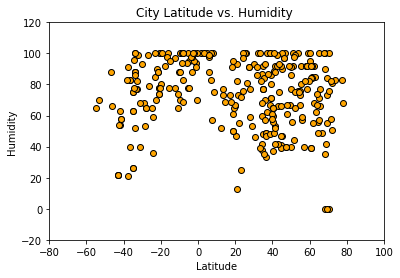

In [26]:
# Humidity vs. Latitude
plt.scatter(city_lat, city_humidity, marker='o', 
            edgecolors="black",
            c="orange")

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity ")

plt.savefig('LatVHumidity.png')
plt.show()

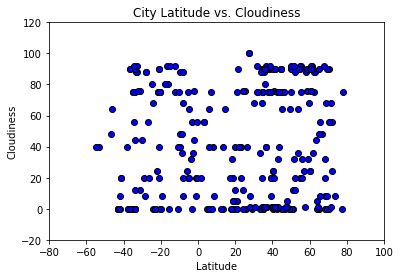

In [27]:
# Cloudiness vs. Latitude
plt.scatter(city_lat, city_clouds, marker='o', 
            edgecolors="black",
            c="blue")

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")

plt.savefig('LatVClouds.png')
plt.show()

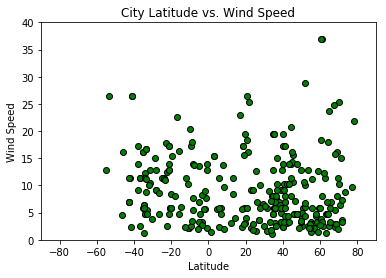

In [28]:
# Wind Speed vs. Latitude
plt.scatter(city_lat, city_wind, marker='o', 
            edgecolors="black",
            c="green")

plt.xlim(-90, 90)
plt.ylim( 0, 40)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

plt.savefig('LatVWind.png')
plt.show()

In [29]:
city_weather.to_csv('WeatherPy.csv')